## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use("dark_background")
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

In [2]:
np.set_printoptions(precision=4) #elegimos la precisión de los decimales en la impresión

# Illustration of Python lists vs. Numpy arrays

In [3]:
print("Python list operations:")
a = [1,2,3]
b = [4,5,6]
print("a+b:", a + b)
try:
    print(a * b)
except TypeError:
    print("a*b has no meaning for Python lists")
print()
print("Numpy array operations:")
a = np.array([1,2,3])
b = np.array([4,5,6])
print("a+b:", a + b)
print("a*b:", a * b)

Python list operations:
a+b: [1, 2, 3, 4, 5, 6]
a*b has no meaning for Python lists

Numpy array operations:
a+b: [5 7 9]
a*b: [ 4 10 18]


In [4]:
a = np.array([[1,2,3],
              [4,5,6]]) 
print(a)

[[1 2 3]
 [4 5 6]]


In [5]:
b = np.array([10,20,30]) #aplicamos la suma de a sobre b, que tiene una dimensión menos (suma para cada fila)
print("a + b:\n", a + b)

a + b:
 [[11 22 33]
 [14 25 36]]


In [6]:
print('a:')
print(a)
print('a.sum(axis=0):', a.sum(axis=0))
print('a.sum(axis=1):', a.sum(axis=1))

a:
[[1 2 3]
 [4 5 6]]
a.sum(axis=0): [5 7 9]
a.sum(axis=1): [ 6 15]


# Basic functions

In [7]:
#usamos la anotación de tipo de retorno o "hints" para indicar que vamos a retornar en estas funciones un objeto de tipo `ndarray`

In [8]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)

In [9]:
# IMG_FOLDER_PATH = '/Users/seth/development/01_deep-learning-from-scratch/images/01_foundations/'
# PDF_IMG_FOLDER_PATH = '/Users/seth/development/01_deep-learning-from-scratch/pdf_images/01_foundations/'

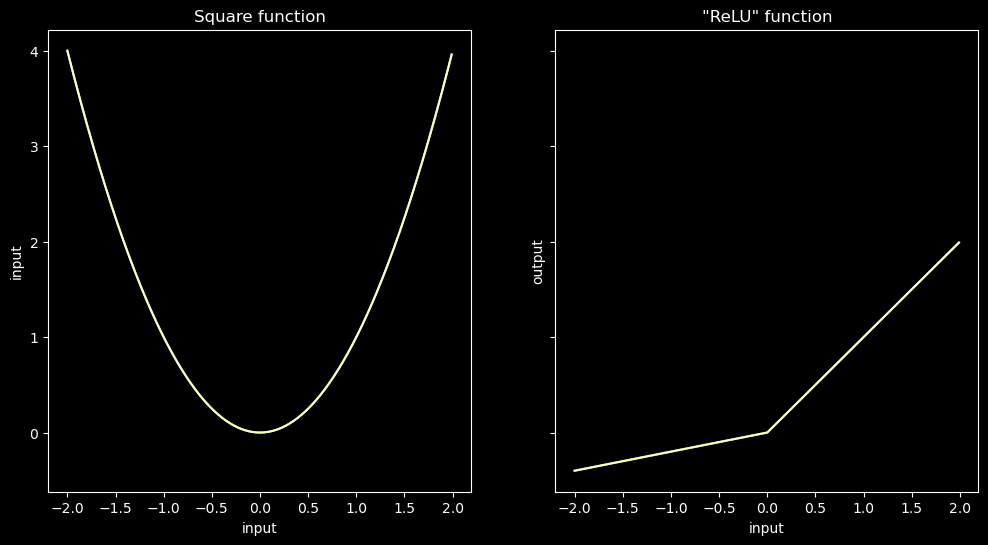

In [10]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('input')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output');
# plt.savefig(IMG_FOLDER_PATH + "01_two_functions.png")
# plt.savefig(PDF_IMG_FOLDER_PATH + "01_two_functions.pdf")

<img src="derivatives.png" alt="diagram" style="display: block; margin: 0 auto;">

**Hay dos formas de calcular la derivada, o calculando el límite de cuando la distancia entre los dos puntos x y x+h, es decir, h tiende a 0, o calcular la pendiente de la recta secante que corta a dos puntos, separados de "a" por una distancia pequeña (0.001 por ejemplo)**

$$ \large \frac{df}{dx}(a) = 
\lim_{\Delta \to 0} \frac{{f \left( {a + \Delta } \right) - f\left( a - \Delta \right)}}{2 * \Delta } $$

Esta técnica es una aproximación finita a la derivada, usando la **diferencia central**, ya que comparamos un punto a, con distancia a+h y a-h a través de una recta secante

In [11]:
def derivative(func, x) -> float: #devolveremos un valor decimal
    
    
    delta_x = 0.001 #small amount of upper & lower difference between the actual x value
    
    result = (func(x+delta_x) - func(x-delta_x)) / ((x + delta_x) - (x - delta_x))
    #f(x+h) - f(x) / x+h - x -> pasa a ser f(x+delta_x) - f(x-delta_x) / x+delta_x - (x-delta_x) --> simplificando el denominador, sería 2*(delta_x)
    
    return result
    
    

In [12]:
square(4)

16

In [13]:
derivative(square, 3)

6.0

Podemos comprobarlo, ya que teniendo $f(x) = x^2$, entonces su derivada (como función) sería $f'(x) = 2x$, y como obtenemos la derivada para el punto concreto, $x=3$, nos da $2*(3) = 6$

Esta vez, aplicado a objetos `ndarray`, a matrices. Obtendremos la derivada en cada punto que indique cada elemento de la matriz, para la función especificada

In [14]:
from typing import Callable
#Callable nos permite especificar que esperamos un objeto que puede ser llamado (una función) con unos parámetros especificados

def deriv(func: Callable[[ndarray], ndarray], #esperamos una función que recibe una matriz de tipo ndarray (x) y que devuelva otra transformada f(x)
          input_: ndarray, 
          diff: float = 0.001) -> ndarray: #devolvemos una nueva matriz (derivada)
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

    
    

In [15]:
points = np.array([[4,2], [3,1], [2,2]])

In [16]:
print(points)

[[4 2]
 [3 1]
 [2 2]]


In [17]:
deriv(func=square,
     input_=points,
     diff=0.001)

array([[8., 4.],
       [6., 2.],
       [4., 4.]])

Ahora, vemos cómo, para cada elemento de las filas de la matriz (en este caso es 2D), tenemos la derivada evaluada en dicho punto

# `Chain`

Usado en funciones compuestas, o conjugadas, donde una función F, toma a otra función p como entrada, siendo $f(p(x))$, leído como "f de p(x)", donde la salida de la función `p(x)` será el valor que tome `f`

In [18]:
from typing import List

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]
#especificamos usando Callable, que esperamos una función f que tome una matriz A, y la transforme en otra aplicando f(A) a cada elemento

# A Chain is a list of functions
Chain = List[Array_Function] #chain esperará una lista que contenga como elementos funciones como las definidas antes.

In [19]:
def chain_length_2(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''
    #si la condición boleana se cumple, el programa seguirá
    #si no se cumple (=False), entonces lanzará un AsssertionError mostrando el mensaje de que la función anidada está compuesta por más de 2 funciones
    
     #usamos el operador \ indicando que continuamos la línea de código en el siguiente renglón.
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"

    #obtenemos la primera función f, y la segunda, p. (f(p(x)))
    f1 = chain[0] 
    f2 = chain[1]
    
    #para ello, primero evaluamos x en la función insertada dentro, z = p(x), y depués evaluamos z en f, f(z)
    return f2(f1(x))

Evaluamos la función compuesta en x=2, como la salida de leaky_relu, al ser mayor a 0, devuelve el mismo valor x, (2), y por último aplicamos la función cuadrática, el resultado es 4

In [20]:
chain_length_2(chain=[square, leaky_relu],
              x=2)

4.0

## Chain derivative

$$ \large \frac{df_2}{dx}(x) = \frac{df_2}{du}(f_1(x)) * \frac{df_1}{dx}(x) $$

Para poder calcular la derivada de una función compuesta, en términos de sus funciones constituyentes, usamos la regla de la cadena (producto de las derivadas de las funciones constituyentes)

<img src="chain rule.png" alt="diagram" width="800" style="display: block; margin: 0 auto;">


Por lo tanto, cuando cambia una unidad en x, esto afecta a la salida de $f_1$ a razón de 3 unidades, que a su vez afecta a la salida de $f_2(f_1)$ que cambia a razón de -2 unidades, dando lugar a multiplicar estas dos razones, siendo 6 la tasa de cambio que tiene $x=5$ entonces en esta función compuesta $f_2(f_1(x))$

In [21]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input Tensor.
    '''
    return np.power(x, 2)

def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input ndarray.
    '''
    return 1 / (1 + np.exp(-x))

Creamos la función que calcula la derivada de una función anidada (en este caso, compuesta por 2 funciones) evaluada en los puntos x que indiquen la matriz 

In [22]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    #comprobamos recibir lo que espera la función
    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    
    #f2(f1(x))
    f1 = chain[0] #el primer elemento de la función será la función interna que se encuentra dentro de la anidada f1
    f2 = chain[1] #el segundo será la función "externa" f2

    # df1/dx
    f1_of_x = f1(input_range) #obtenemos el valor de la función en los puntos de x deseados (que se encuentran en la matriz input_range)

    # df1/du
    df1dx = deriv(func=f1, input_=input_range) #obtenemos la derivada de la función

    # df2/du(f1(x))
    df2du = deriv(func=f2, input_=f1(input_range))
    
    # Multiplying these quantities together at each point
    return df1dx * df2du #aplicamos la regla de la cadena

Esta función graficará la función anidada, mostrando el rango de x `input_range`

In [23]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - 
    Across the input_range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

Esta función graficará la derivada evaluada en los puntos que indiquen los elementos de la matriz `input_range` en la función compuesta `chain`

In [24]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of a function consisting of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

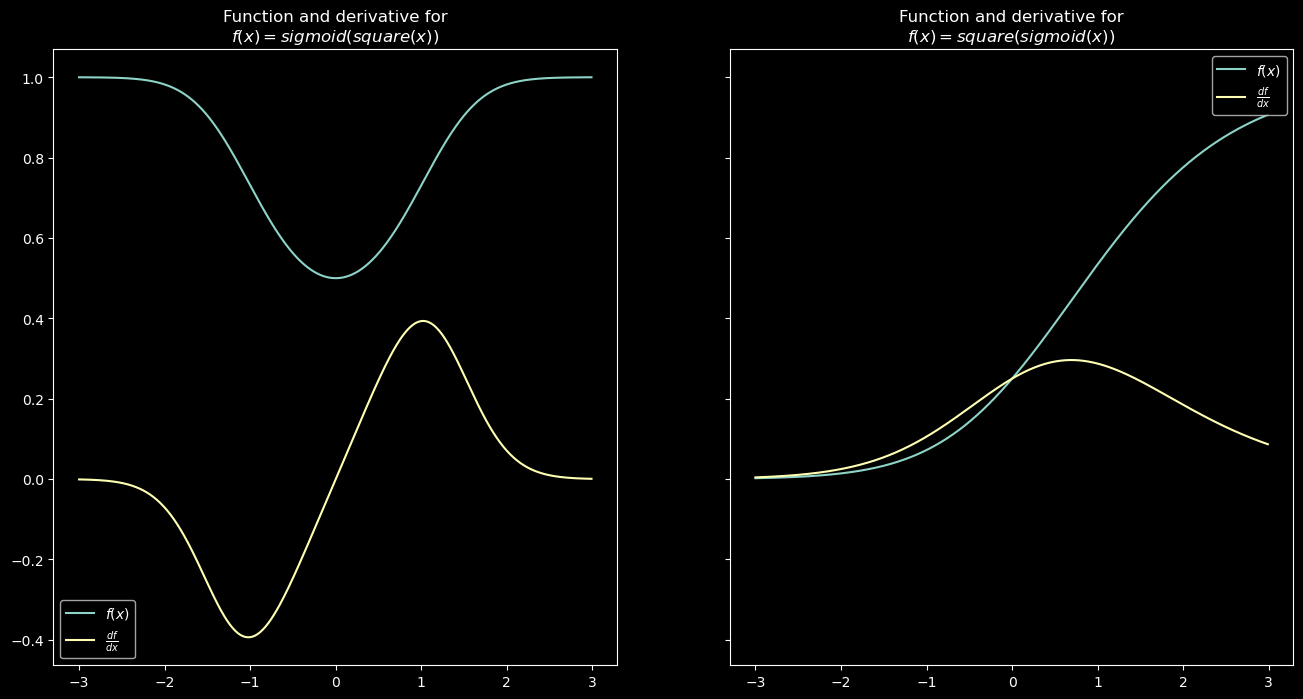

In [25]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

# plt.savefig(IMG_FOLDER_PATH + "08_plot_chain_rule_1.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "08_plot_chain_rule_1.pdf");

En cada gráfica, vemos la función compuesta, una realiza `sigmoid(square(x))` y la otra `square(sigmoid(x))`, y para cada una, visualizamos su respectiva derivada (obtenida a través de la regla de la cadena)

# `Chain of length 3`

Aplicamos el mismo concepto que con longitud 2

$$ \large \frac{df_3}{dx}(x) = \frac{df_3}{dv}(f_2(f_1(x))) * \frac{df_2}{du}(f_1(x)) * \frac{df_1}{dx}(x) $$

<img src="chain rule2.png" alt="diagram" width="800" style="display: block; margin: 0 auto;">


Un ejemplo

<img src="chain rule example.png" alt="chain rule example" width="800" style="display: block; margin: 0 auto;">


In [26]:
def chain_length_3(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain".
    '''
    assert len(chain) == 3, \
    "Length of input 'chain' should be 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x))) #algo muy similar a forward pass

In [27]:
def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''
    
    #comprobamos que la cantidad de funciones sea 3
    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input_range)
    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    
    # df3du
    df3du = deriv(f3, f2_of_x) #derivamos f3 en términos de f2(f1(a))

    # df2du
    df2du = deriv(f2, f1_of_x) #derivamos f2 en términos de f1(a)

    # df1dx
    df1dx = deriv(f1, input_range) #finalmente, derivamos f1(a) en términos de a (input_range)

    # Multiplying these quantities together at each point
    return df1dx * df2du * df3du

In [28]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)

def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply "sigmoid" function to each element in ndarray
    '''
    return 1 / (1 + np.exp(-x))

In [29]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray,
               length: int=2) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - across one range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

In [30]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)

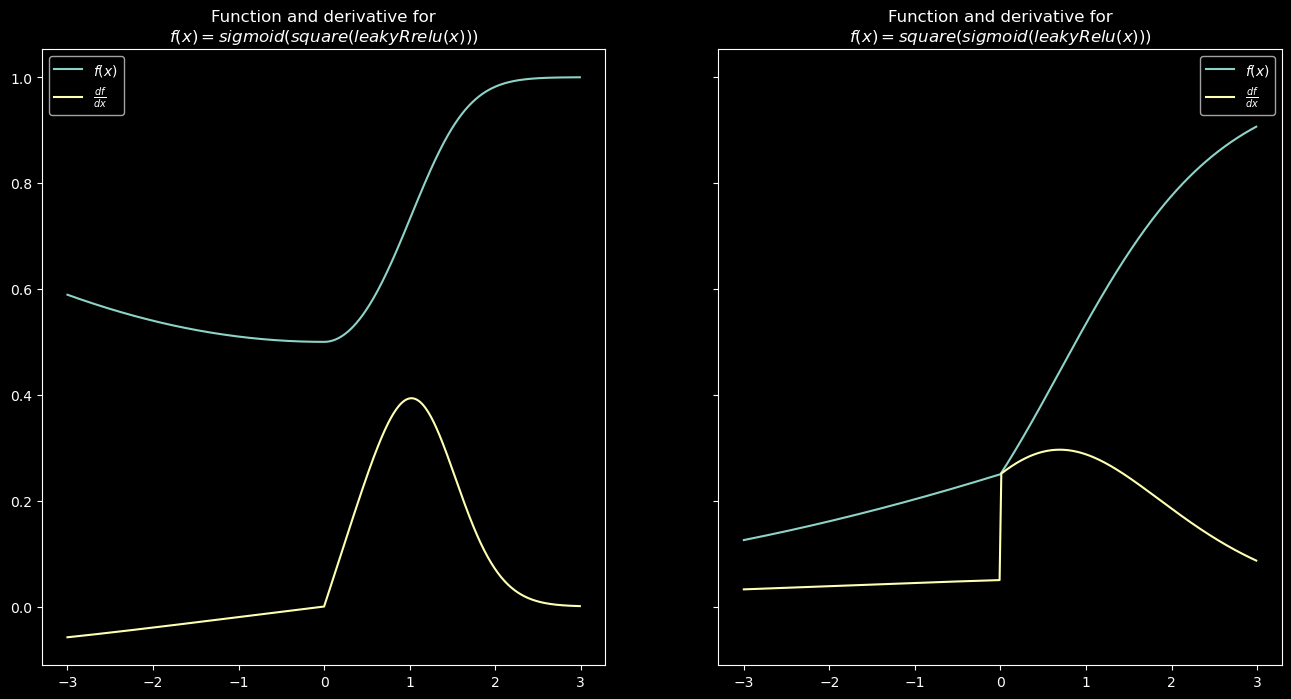

In [31]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRrelu(x)))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$");

# plt.savefig(IMG_FOLDER_PATH + "09_plot_chain_rule_2.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "09_plot_chain_rule_2.pdf");

# Function with multiple inputs example

Funciones que toman dos variables o más, pueden ser representadas así. $ f(x, y) = s$, donde $a$ representa una suma de dichas variables. $ a = a(x, y) = x + y $ . A su vez, $s$, aplica una función no-lineal sobre la salida de $a$, teniendo una función anidada $ s = \sigma(a) $

Podemos calcular la derivada (parcial) para cada una de las variables como sigue:

$$ \large f(x, y) = s(a(x, y)) $$

$$ \large \frac{\partial f}{\partial x} = \frac{\partial \sigma}{\partial u}(a(x, y)) * \frac{\partial a}{\partial x}((x, y)) \\ = \large\frac{\partial \sigma}{\partial u}(x + y) * \frac{\partial a}{\partial x}((x, y))$$

- En el caso de $\large \frac{\partial f}{\partial x}$, medimos la razón a la que cambia la función, cuando cambiamos x por un pequeño valor $\Delta$, mientras que y permanece constante, es decir, permanece sin modificaciones

- Análogamente, con $\large \frac{\partial f}{\partial y}$, ahora cambiaremos la variable y por dicho valor $\Delta$, y x permanecerá constante

<img src="chain rule with partial derivatives.png" alt="chain rule with partial derivatives" width="900" style="display: block; margin: 0 auto;">

In [32]:
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    '''
    Function with multiple inputs and addition, forward pass
    '''
    assert x.shape == y.shape #al ser dos variables de entrada, la dimensión de los ndarrays debe ser la misma

    a = x + y 
    return sigma(a) #calcula la función no-lineal sobre a, siendo sigma(a) = sigma(a+b)

In [33]:
def multiple_inputs_add_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float:
    '''
    Computes the derivative of this simple function with respect to
    both inputs
    '''
    # Compute "forward pass"
    a = x + y

    # Compute derivatives
    dsda = deriv(sigma, a) #derivada de sigma respecto a "a"

    dadx, dady = 1, 1 #la derivada parcial de a (x+y) es 1 para ambas variables, independientemente de su valor, ya que por cada unidad que incrementa x,
    #a aumenta también por una unidad, al estar sumándose x

    return dsda * dadx, dsda * dady #obtenemos la derivada parcial para cada uno (que en este caso sería la misma para ambas variables)

Additional exercise, in this time, we'll have a nested function like this:

$$ f(x, y) = s$$

$$ a = a(x, y) = x * y $$

$$ s = \sigma(a) $$

In [34]:
def multiple_inputs_mul(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    '''
    Function with multiple inputs and multiplication, forward pass
    '''
    assert x.shape == y.shape

    a = x * y 
    return sigma(a) #calcula la función no-lineal sobre a, siendo sigma(a) = sigma(a*b)

In [35]:
def partial_deriv_x(func: Callable[[ndarray, ndarray], ndarray], #esperamos una función que recibe una matriz de tipo ndarray (x) y que devuelva otra transformada f(x)
          input_: List[ndarray], 
          diff: float = 0.001) -> ndarray: #devolvemos una nueva matriz (derivada)
    
    '''
    Evaluates the partial derivative in respect to 'x' of a function "func" at every element in the "input_" array.
    '''
    assert len(input_) == 2 
    assert input_[0].shape == input_[1].shape
    
    
    return (func(input_[0] + diff, input_[1]) - func(input_[0] - diff,  input_[1])) / (2 * diff)

def partial_deriv_y(func: Callable[[ndarray, ndarray], ndarray], #esperamos una función que recibe una matriz de tipo ndarray (x) y que devuelva otra transformada f(x)
          input_: List[ndarray], 
          diff: float = 0.001) -> ndarray: #devolvemos una nueva matriz (derivada)
    '''
    Evaluates the partial derivative in respect to 'y' of a function "func" at every element in the "input_" array.
    '''
    assert len(input_) == 2 
    assert input_[0].shape == input_[1].shape
    
    
    return (func(input_[0], input_[1] + diff) - func(input_[0], input_[1] - diff)) / (2 * diff)

In [36]:
def alpha(x,y):
    return x*y

In [37]:
def multiple_inputs_mul_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float:
    '''
    Computes the derivative of this simple function with respect to
    both inputs
    '''
    # Compute "forward pass"
    a = alpha(x,y)
    
    # Compute derivatives
    ds_da = deriv(sigma, a)
    
    da_dx = partial_deriv_x(func=alpha, input_=[x,y])
    
    da_dy = partial_deriv_y(func=alpha, input_=[x,y]) 
    
    return ds_da * da_dx, ds_da * da_dy #retornamos las derivadas parciales para cada variable

In [38]:
multiple_inputs_mul_backward(x=np.array([3]), y=np.array([1]), sigma=square)

(array([6.]), array([18.]))

# Function with matrix multiplication

In [39]:
def matmul_forward(X: ndarray,
                   W: ndarray) -> ndarray:
    '''
    Computes the forward pass of a matrix multiplication
    '''
    
    assert X.shape[1] == W.shape[0], \
    '''
    For matrix multiplication, the number of columns in the first array should match the
    number of rows in the second, instead the number of columns in the first array is {0}
    and the number of rows in the second array is {1}
    '''.format(X.shape[1], W.shape[0])

    # matrix multiplication
    N = np.dot(X, W)

    return N

$$ \large
\begin{bmatrix}
2 & 4 & 9
\end{bmatrix}
\cdot
\begin{bmatrix}
3 \\
2 \\
1
\end{bmatrix}
$$


$(2*3)$ + $(4*2)$ + $(9*1) = 23$

In [40]:
matmul_forward(X=np.array([[2,4,9]]), W=np.array([3,2,1]))

array([23])

La derivada del producto punto en términos de sus elementos resulta ser:

<img src="derivative of dot product.png" alt="derivative of dot product" width="800" style="display: block; margin: 0 auto;">

Nos da como resultado los coeficientes de cada variable, por ejemplo si realizamos la derivada en respecto del vector X, obtendremos (lo que antes era la matriz de pesos) traspuesta convertida en un vector de la misma forma que X, por lo que obtenemos los coeficientes de cada multiplicación del producto punto

In [41]:
def matmul_backward_first(X: ndarray,
                          W: ndarray) -> ndarray:
    '''
    Computes the backward pass of a matrix multiplication with respect to the first argument.
    '''

    # backward pass
    dNdX = np.transpose(W, (1, 0))

    return dNdX

In [42]:
np.random.seed(190203)

X = np.random.randn(1,3)
W = np.random.randn(3,1)

print(X)
matmul_backward_first(X, W) #ahora lo que era antes un vector de pesos, se convierte una matriz, al haber realizado la operación de trasposición

[[ 0.4723  0.6151 -1.7262]]


array([[ 0.9282, -0.6075, -1.2214]])

In [43]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function) -> ndarray:
    '''
    Computes the forward pass of a function involving matrix multiplication, one extra function
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    return S

# Derivative of a function with matrix multiplication

<img src="diagram.png" alt="diagram" width="800" style="display: block; margin: 0 auto;">

<img src="derivative in terms of a matrix.png" alt="chain rule with partial derivatives" width="600" style="display: block; margin: 0 auto;">

If: 

* $X$ is $m x n$
* $W$ is $n x p$

Then $X * W$ will be $m x p$:

If the derivative of a loss with respect to each output $N$ is $m x p$, then

* $\frac{\partial N}{\partial X} = N * W^T$ (`np.dot((m,p), (p,n)) = m x n`
* $\frac{\partial N}{\partial W} = X^T * N$ (`np.dot((n,m), (m,p)) = n x p`

In particular, the matrix multiplication on the backward pass must be done in this order.

In [44]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of our matrix function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N) #la derivada de la función no-lineal respecto al valor N resultante del producto punto

    # dNdX
    dNdX = np.transpose(W, (1, 0)) #sería la derivada parcial de cada elemento de X, que devuelve sus respectivos coeficientes (pesos) traspuestos

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

In [45]:
X

array([[ 0.4723,  0.6151, -1.7262]])

In [46]:
W

array([[ 0.9282],
       [-0.6075],
       [-1.2214]])

Obtenemos la derivada parcial de la salida del forward pass respecto cada elemento de **$X$** 

In [47]:
print(matrix_function_backward_1(X, W, sigmoid))

[[ 0.0852 -0.0557 -0.1121]]


In [48]:
X[0, 2]

-1.7262271543679046

Podremos comprobar si este resultado es correcto de la siguiente manera:

- Mediante la función `forward_test()`, seleccionaremos el último elemento de la matriz columna **X**, y le haremos un incremento que indique el parámetro `incr`

- Por último, la función retornará la salida total de la función compuesta (forward pass) de $\sigma(v(X,W))$ con ese valor x3 de la matriz columna X modificado

In [49]:
def forward_test(ind1, ind2, inc):
    
    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc
    return matrix_forward_extra(X1, W, sigmoid)

- Una vez tenemos el valor de la función total (forward pass) con ese elemento de **$X$** modificado, podemos ver lo siguiente:

In [50]:
forward_test(ind1=0, ind2=2, inc=0) #el valor de la función sin modificar nada

array([[0.8978]])

El valor de la función total decrece al haber incrementado x3 de la matriz columna X en 0.01, ya que dicho valor (x3) era negativo **($-1.7262$)**, por lo que sumarle 0.01 **($-1.7262 + 0.01 = -1.752$)**, por lo que obtenemos un valor más pequeño en x3, que **se traduce en un decrecimiento del valor del producto punto, y a su vez de la salida de la función sigma sobre dicho resultado, aplicando la regla de la cadena**

<img src="derivative example.png" alt="derivative example" width="600" style="display: block; margin: 0 auto;">

In [51]:
forward_test(ind1=0, ind2=2, inc=0.01) #el valor de la función al incrementar el elemento x3 en 0.01

array([[0.8967]])

In [52]:
forward_test(ind1=0, ind2=2, inc=0.01) - forward_test(ind1=0, ind2=2, inc=0)

array([[-0.0011]])

Básicamente realizamos una derivada manualmente, para comprobar que coincida con la función del backward pass

In [53]:
#calculamos la diferencia entre la función con dicho elemento modificado - la función sin modificar nada (derivada manualmente)
(np.round(forward_test(ind1=0, ind2=2, inc=0.01) - forward_test(ind1=0, ind2=2, inc=0), 4)) / 0.01 #sería f(x+h) - f(x) /h

array([[-0.11]])

Si lo comparamos ahora con el gradiente respectivo a ese valor x3 de la matriz columna X usando la función que habíamos creado antes:

In [54]:
np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 2) #en la salida de las derivadas parciales, indexamos por la derivada de x3

-0.11

Same! Gradients check.

# Matrix function with sum

In [55]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [56]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of this function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W.transpose(0, 1))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

# Matrix function with two 2D matrices

(See image file `derivatives of 2D matrices.png`)

<img src="derivatives of 2D matrices.png" alt="derivatives of 2D matrices" width="10000" style="display: block; margin: 0 auto;">

In [57]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [59]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    '''
    Compute derivative of matrix function with a sum with respect to the
    first matrix input
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    # note: I'll refer to the derivatives by their quantities here,
    # unlike the math where we referred to their function names

    # dLdS - just 1s
    dLdS = np.ones_like(S)
    
    # dSdN
    dSdN = deriv(sigma, N)
    
    # dLdN
    dLdN = dLdS * dSdN
    # dNdX
    dNdX = np.transpose(W, (1, 0))
    # dLdX
    dLdX = np.dot(dSdN, dNdX)

    return dLdX

#### Testing

Ver también la imagen `2D matrix chain rule example.png` 

<img src="2D matrix chain rule example.png" alt="2D matrix chain rule example" width="1000" style="display: block; margin: 0 auto;">

In [60]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X:") #imprimimos el valor de la matriz X
print(X)

print("L:")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4)) #imprimos el valor total de la función anidada
print()
print("dLdX:")
print(matrix_function_backward_sum_1(X, W , sigmoid))#y el gradiente respecto a la matriz X

X:
[[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]
L:
2.3755

dLdX:
[[ 0.2489 -0.3748  0.0112]
 [ 0.126  -0.2781 -0.1395]
 [ 0.2299 -0.3662 -0.0225]]


In [69]:
X1[0,0]

-1.5765281559147786

Probamos a cambiar el primer valor de la matriz **$X$** en un incremento de `0.001`. Por lo tanto, para comprobar que los gradientes son correctos, realizamos una derivada manualmente, sabiendo que $((f(a) + h) - f(a)) = h*f'(a)$, de modo que despejando la derivada, deberíamos obtener el mismo valor que el gradiente de x11 $(((f(a) + h) - f(a))) / h$

In [61]:
X1 = X.copy()
X1[0, 0] += 0.001

print(round(
        (matrix_function_forward_sum(X1, W, sigmoid) - \
         matrix_function_forward_sum(X, W, sigmoid)) / 0.001, 4))

0.2489


In [68]:
(matrix_function_forward_sum(X1, W, sigmoid) - matrix_function_forward_sum(X, W, sigmoid)) / 0.001

0.24889684117646027

Same again!

### Plotting

In [73]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function,
                                modify_x11: bool = False,
                                x11: float = 0.5) -> float:
    '''
    Computing the result of the forward pass of this function with
    input Tensors X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]
    
    if modify_x11:
        X1 = X.copy()
        X1[0][0] = x11

    # matrix multiplication
    N = np.dot(X1, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [74]:
print("X:")
print(X)

X:
[[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]


Para el valor de la matriz **$X$**, x11, daremos valores desde su valor actual-1 hasta el mismo+1, en pasos de 0.01

In [75]:
x11s = np.arange(X[0][0] - 1, X[0][0] + 1, 0.01)
Ls = [matrix_function_forward_sum(X, W, sigmoid,
                                  modify_x11 = True,
                                  x11=x11) for x11 in x11s]

- Graficamos cómo se comporta la salida de la función anidada (**$L$**) en función del valor de x11 de la matriz **$X$** (eje x), dejando los demás valores de las 2 entradas (tanto los demás elementos de la matriz X, como los de W) constantes

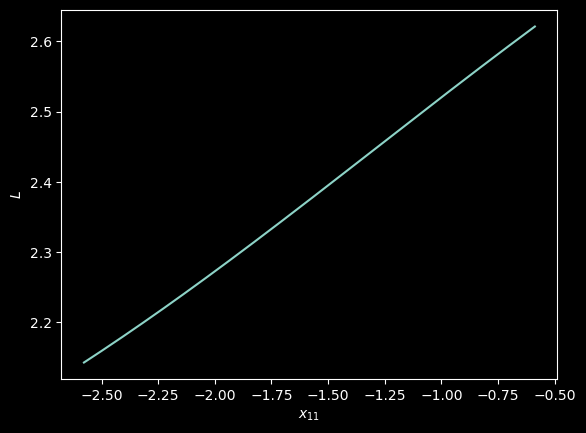

In [76]:
plt.plot(x11s, Ls);
# plt.title("Value of $L$ as $x_{11}$ changes holding\nother values of $X$ and $W$ constant")
plt.xlabel("$x_{11}$")
plt.ylabel("$L$");
# plt.savefig(IMG_FOLDER_PATH + "18_x11_vs_L.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "18_x11_vs_L.pdf");

Si calculamos la pendiente de la gráfica, sabiendo que x11, le habíamos dado unos valores desde -2.50 hasta -0.50, lo que es un cambio (distancia) de 2, y la salida, Ls cambia alrededor de 0.5 (desde 2 hasta 2.6), tenemos que dicha pendiente es:

In [87]:
np.round(max(Ls) - min(Ls),1) /  np.round(x11s.max() - x11s.min(), 1)

0.25

Que es justamente el gradiente (derivada parcial) total que habíamos obtenido de la salida total respecto a la matriz X, en el elemento x11

In [89]:
print(matrix_function_backward_sum_1(X, W , sigmoid))

[[ 0.2489 -0.3748  0.0112]
 [ 0.126  -0.2781 -0.1395]
 [ 0.2299 -0.3662 -0.0225]]


In [92]:
print(np.round(matrix_function_backward_sum_1(X, W , sigmoid)[0,0], 2))

0.25


Nota: Si realizamos la derivada de la función respecto a los pesos, W, la multiplicación que lleva a cabo la regla de la cadena deberá ser hacer el producto punto primero entre np.transpose(X) (que sería la derivada de X*W respecto a X) y la derivada de la salida total respecto a S, y por último dicho resultado, multiplicado elemento a elemento con la derivada de S respecto a XW